In [1]:
#loading the dataset
import pandas as pd
import numpy as np

file = 'Data/dow_jones_index.data'
cols = ['Quarter', 'Stock', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', '% Change in Price',
       '% Change in Volume', 'Previous Week\'s Volume', 'Next Week\'s Open', 'Next Week\'s Close',
       '% Change in Price Next Week', 'Days to next Dividend', 'Return on Next Dividend']

dowjones = pd.read_csv(file, names=cols, header = 0, parse_dates=[2])
dowjones.head()

,Quarter,Stock,Date,Open,High,Low,Close,Volume,% Change in Price,% Change in Volume,Previous Week's Volume,Next Week's Open,Next Week's Close,% Change in Price Next Week,Days to next Dividend,Return on Next Dividend
0,1,AA,2011-01-07,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,2011-01-14,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,2011-01-21,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,2011-01-28,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2011-02-04,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [2]:
# cleaning up the dataset
# all null values exist because there's no previous date to compare it to
print'total NaNs', dowjones.isnull().sum().sum()
mask_date = dowjones['Date'] != '2011-01-07'
dowjones = dowjones.loc[mask_date]
print'total NaNs', dowjones.isnull().sum().sum()

# removing the the dollar signs in the dataset
dollarcols =['Open', 'High', 'Low', 'Close', 'Next Week\'s Open','Next Week\'s Close']

for cols in dollarcols:
    dowjones[cols] = dowjones[cols].str.strip('$')
    dowjones[cols] = pd.to_numeric(dowjones[cols])

# cheking the datatype
for cols in dowjones.columns:
    print cols,':', dowjones[cols].dtype

total NaNs 60
total NaNs 0
Quarter : int64
Stock : object
Date : datetime64[ns]
Open : float64
High : float64
Low : float64
Close : float64
Volume : int64
% Change in Price : float64
% Change in Volume : float64
Previous Week's Volume : float64
Next Week's Open : float64
Next Week's Close : float64
% Change in Price Next Week : float64
Days to next Dividend : int64
Return on Next Dividend : float64


In [3]:
# summary statistics
print'Quarter: \n', dowjones['Quarter'].value_counts()
print'Stock: \n', dowjones['Stock'].value_counts()
print'Date: \n', dowjones['Date'].value_counts()

for i in range(3, len(dowjones.columns)):
    col = dowjones.columns[i]
    print col, ':\n', dowjones[col].describe()

Quarter: 
2    390
1    330
Name: Quarter, dtype: int64
Stock: 
JNJ     24
MSFT    24
BA      24
CVX     24
DD      24
KRFT    24
CAT     24
KO      24
BAC     24
HD      24
DIS     24
PG      24
IBM     24
AA      24
PFE     24
VZ      24
INTC    24
HPQ     24
WMT     24
GE      24
T       24
MRK     24
UTX     24
XOM     24
TRV     24
JPM     24
MCD     24
CSCO    24
MMM     24
AXP     24
Name: Stock, dtype: int64
Date: 
2011-06-17    30
2011-05-20    30
2011-04-21    30
2011-02-18    30
2011-03-18    30
2011-04-15    30
2011-05-13    30
2011-06-10    30
2011-01-14    30
2011-02-11    30
2011-03-11    30
2011-04-08    30
2011-05-06    30
2011-06-03    30
2011-02-04    30
2011-03-04    30
2011-04-01    30
2011-04-29    30
2011-05-27    30
2011-06-24    30
2011-01-28    30
2011-02-25    30
2011-03-25    30
2011-01-21    30
Name: Date, dtype: int64
Open :
count    720.000000
mean      53.748375
std       32.764255
min       10.590000
25%       29.965000
50%       46.015000
75%       72.

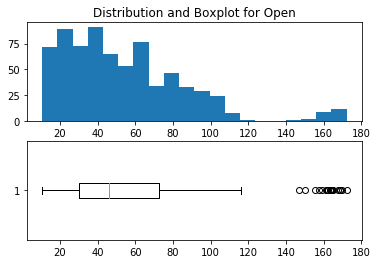

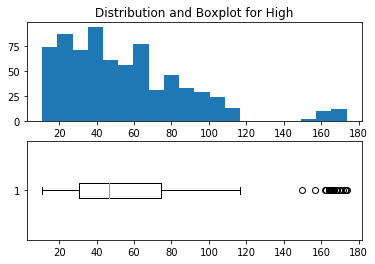

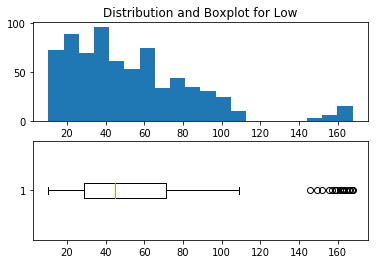

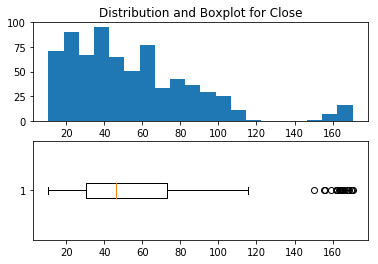

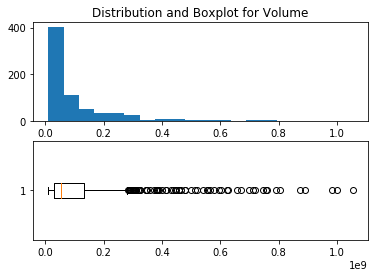

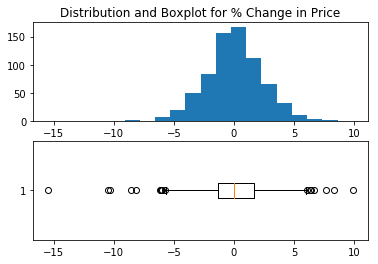

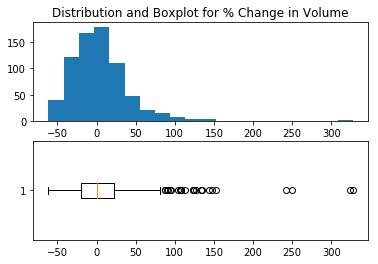

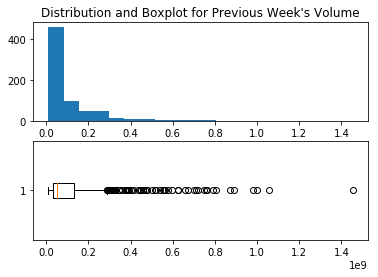

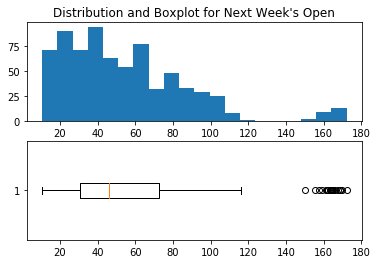

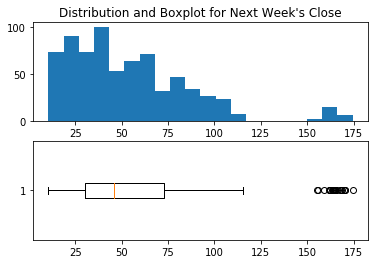

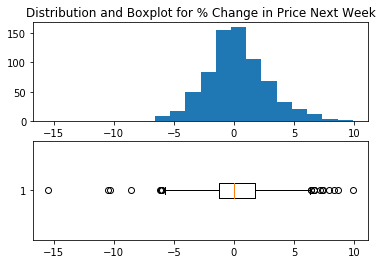

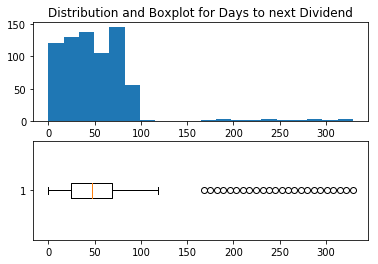

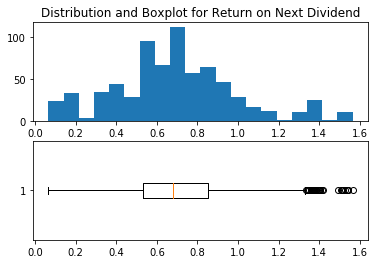

TypeError: cannot perform reduce with flexible type

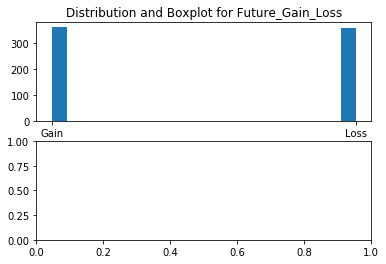

In [17]:
#creating visualisations for all of the quantitative features
import matplotlib.pyplot as plt

for i in range(3, len(dowjones.columns)):
    plt.subplot(2,1,1)
    plt.hist(dowjones[dowjones.columns[i]], bins=20, histtype='bar')
    plt.xlabel(dowjones.columns[i])
    plt.title('Distribution and Boxplot for {}'.format(dowjones.columns[i]))
    
    plt.subplot(2,1,2)
    plt.boxplot(dowjones[dowjones.columns[i]],vert=0)
    plt.show()

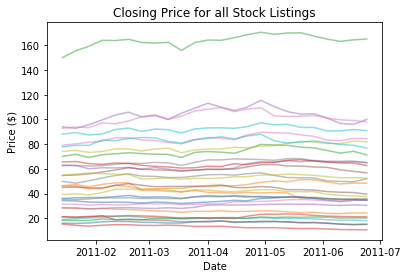

In [5]:
# visualising the price movement
companies = dowjones['Stock'].unique()
for c in companies:
    mask_comp = dowjones['Stock'] == c
    comp = dowjones.loc[mask_comp]
    
    plt.plot(comp['Date'], comp['Close'], alpha = .5, label = c)

plt.title('Closing Price for all Stock Listings')
plt.xlabel('Date')
plt.ylabel('Price ($)')   
plt.show()

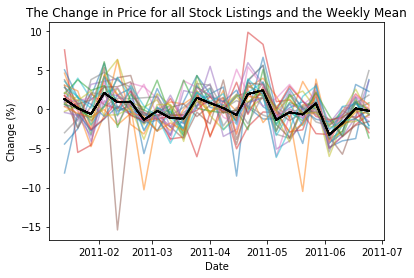

In [6]:
# visualising the price change 
companies = dowjones['Stock'].unique()
for c in companies:
    mask_comp = dowjones['Stock'] == c
    comp = dowjones.loc[mask_comp]
    plt.plot(comp['Date'], comp['% Change in Price'], alpha = .5, label = c)

    plt.plot(comp['Date'],  dowjones.groupby(dowjones['Date'])['% Change in Price'].mean(),
         color = 'black')
plt.title('The Change in Price for all Stock Listings and the Weekly Mean')
plt.xlabel('Date')
plt.ylabel('Change (%)')   
plt.show()

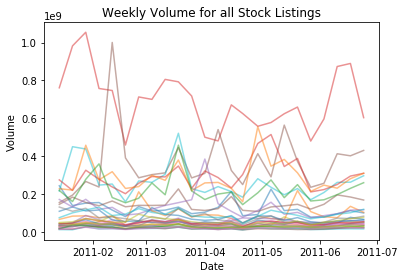

In [7]:
# visualising the volume
companies = dowjones['Stock'].unique()
for c in companies:
    mask_comp = dowjones['Stock'] == c
    comp = dowjones.loc[mask_comp]
    
    plt.plot(comp['Date'], comp['Volume'], alpha = .5)

plt.title('Weekly Volume for all Stock Listings')
plt.xlabel('Date')
plt.ylabel('Volume')   
plt.show()

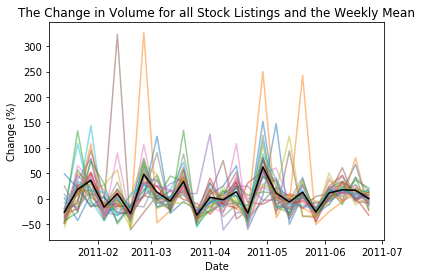

In [8]:
# visualising the change in volume
companies = dowjones['Stock'].unique()
for c in companies:
    mask_comp = dowjones['Stock'] == c
    comp = dowjones.loc[mask_comp]
    plt.plot(comp['Date'], comp['% Change in Volume'], alpha = .5)

plt.plot(comp['Date'],  dowjones.groupby(dowjones['Date'])['% Change in Volume'].mean(),
         color = 'black')
plt.title('The Change in Volume for all Stock Listings and the Weekly Mean')
plt.xlabel('Date')
plt.ylabel('Change (%)')   
plt.show()

C:\Users\jack\Anaconda2\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  import sys


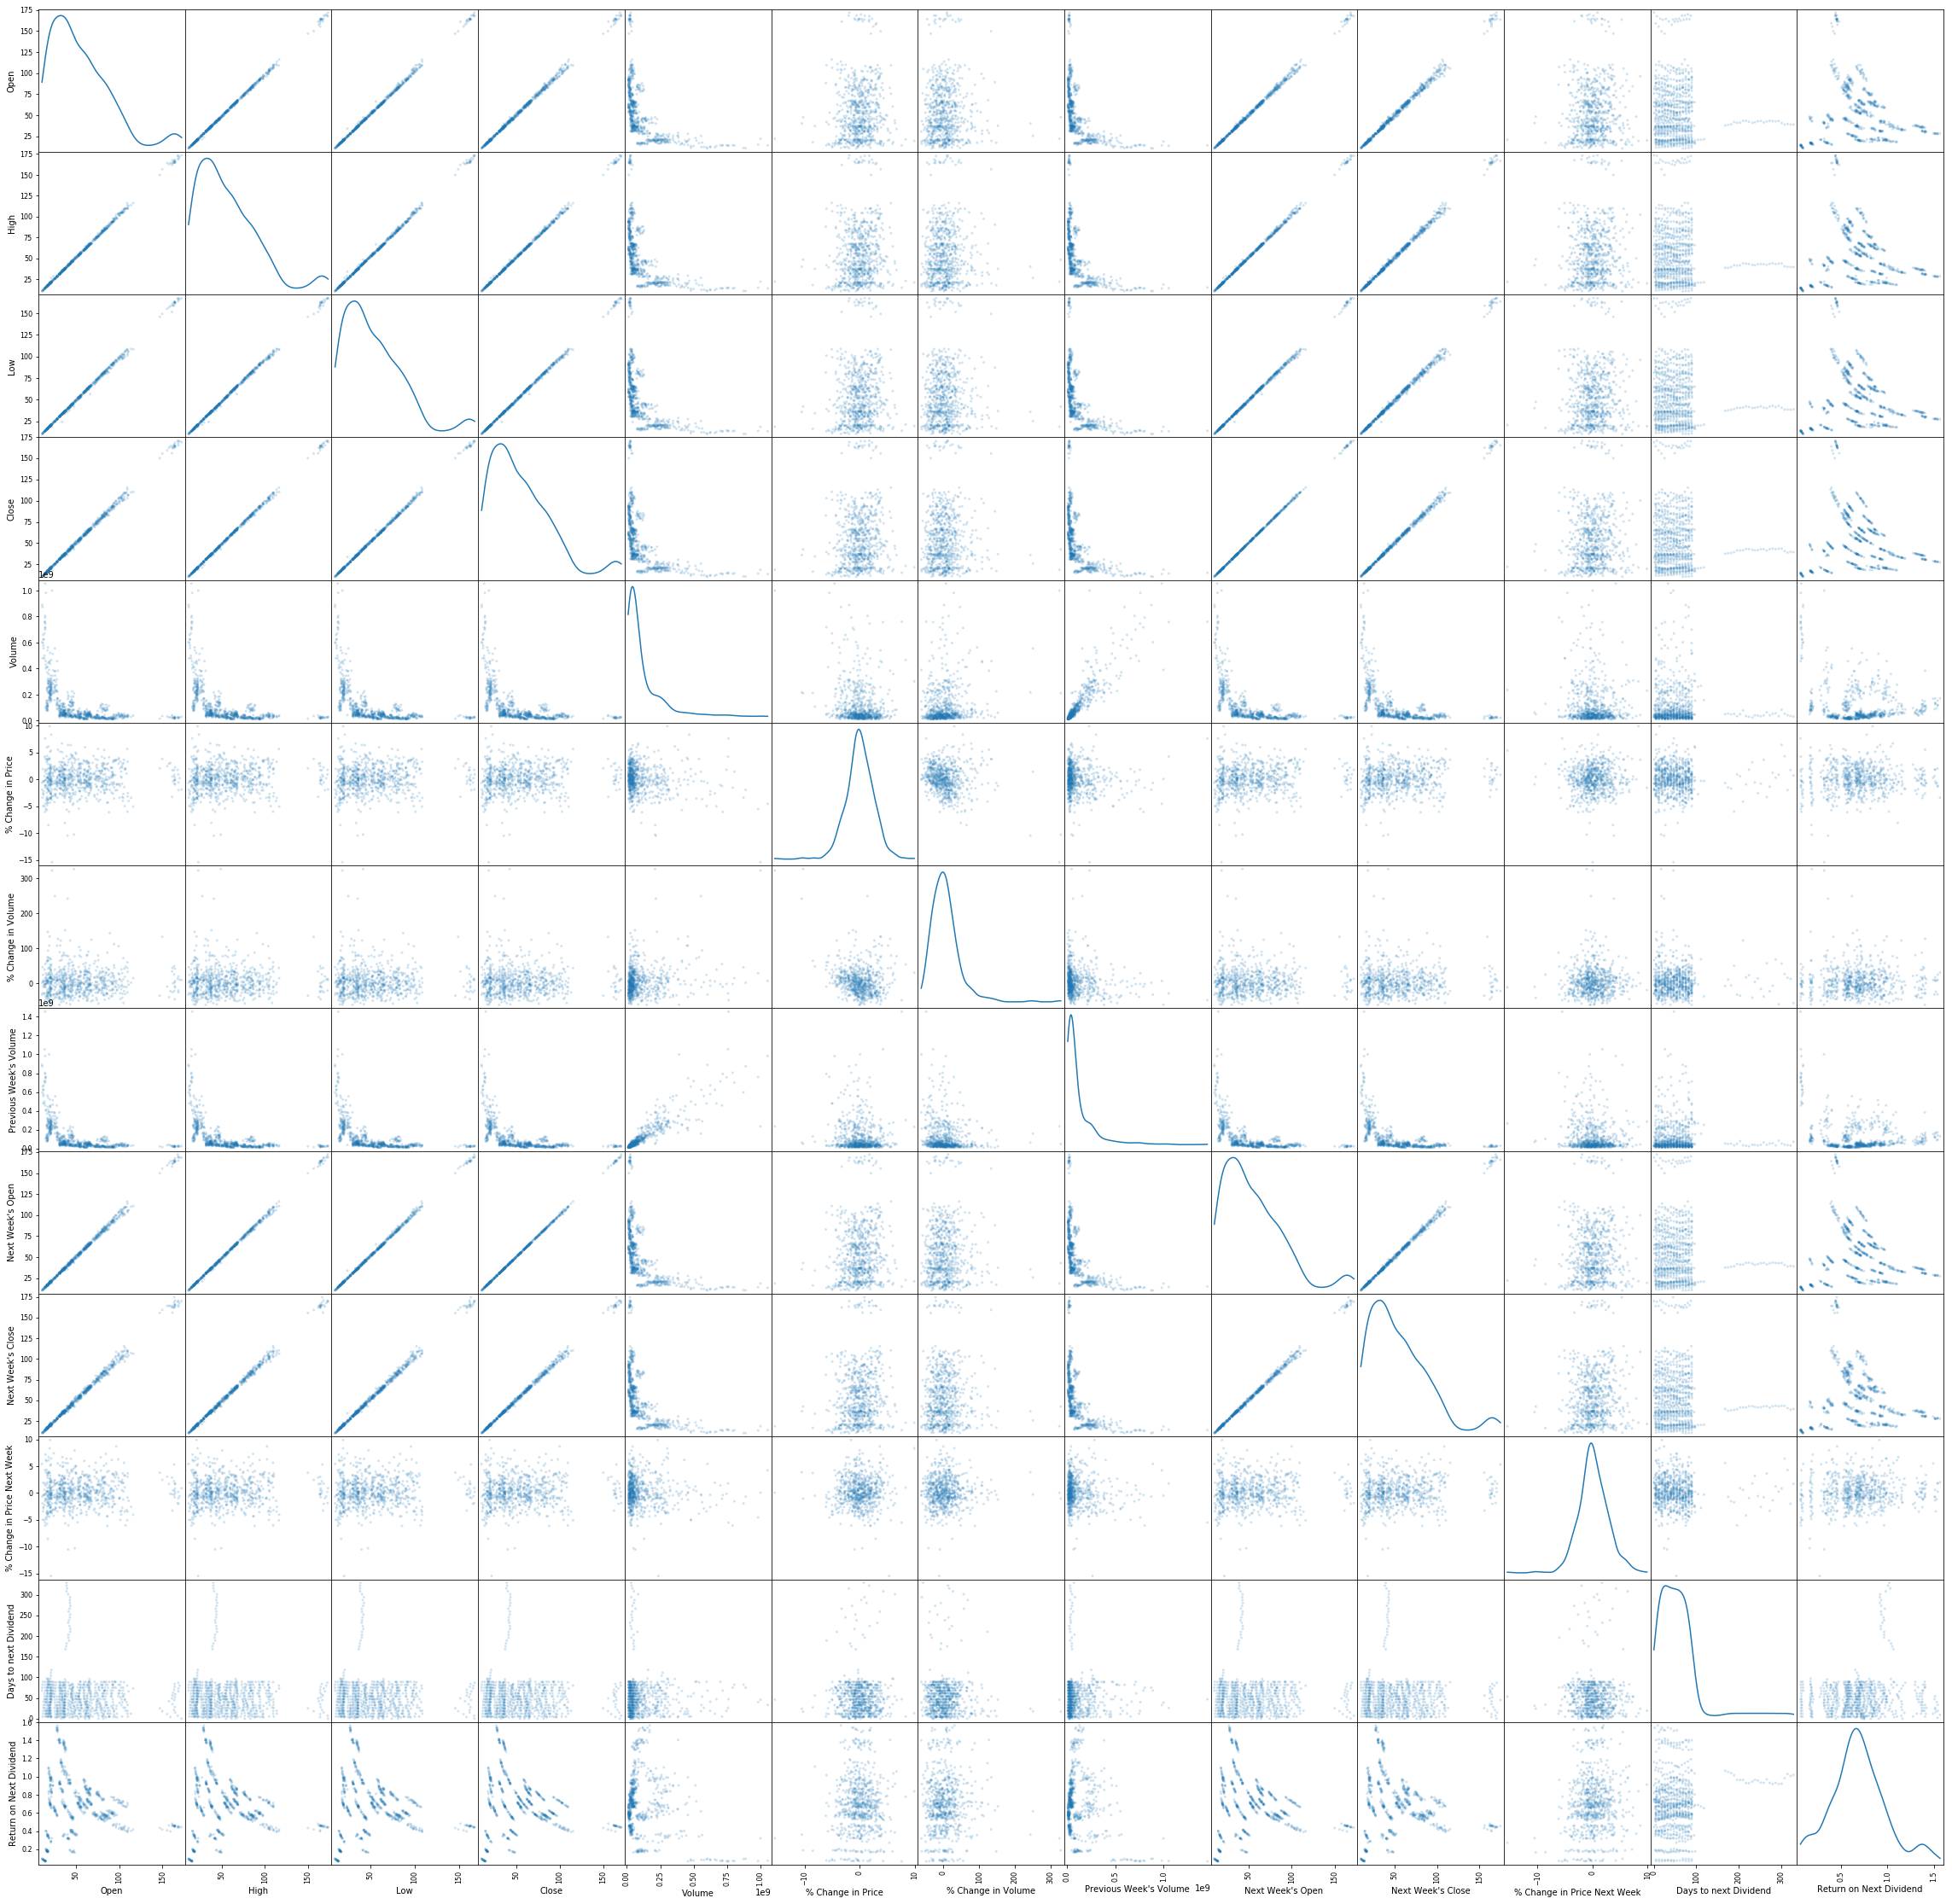

In [9]:
# scatter matrix 
from pandas.tools.plotting import scatter_matrix
dj_matrix = dowjones[['Open', 'High', 'Low', 'Close', 'Volume', '% Change in Price','% Change in Volume', 
                     'Previous Week\'s Volume', 'Next Week\'s Open', 'Next Week\'s Close',
                     '% Change in Price Next Week', 'Days to next Dividend', 'Return on Next Dividend']]

scatter_matrix(dj_matrix, alpha=0.2, figsize=(40, 40), diagonal='kde')
plt.show()

In [10]:
# creating the target feature for modelling
dowjones['Future_Gain_Loss'] = 'Loss'

mask_G =dowjones['% Change in Price Next Week'] > 0
dowjones.loc[mask_G, 'Future_Gain_Loss'] = 'Gain'

dowjones['Future_Gain_Loss'].value_counts()

Gain    362
Loss    358
Name: Future_Gain_Loss, dtype: int64

In [11]:
# formatting the variables for modelling
y = dowjones['Future_Gain_Loss']
X = dowjones[['Open', 'High', 'Low', 'Close', 'Volume', '% Change in Price','% Change in Volume', 
              'Previous Week\'s Volume','Days to next Dividend', 'Return on Next Dividend']]

In [12]:
#splitting the data for training and testing
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 7)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

(540, 10) (180, 10) (540L,) (180L,)


C:\Users\jack\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [13]:
# decision tree modelling 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

clf1 = DecisionTreeClassifier(min_samples_split = 0.1, min_samples_leaf = 0.15, random_state = 17)
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)

count = 0
for i in range(0, len(y_pred)):
    if y_pred[i] != list(y_test)[i]:
        count += 1
        
error_rate = count*len(y_pred)**-1  

report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print report,'\n', cm,'\n', error_rate

             precision    recall  f1-score   support

       Gain       0.60      0.65      0.62        89
       Loss       0.63      0.57      0.60        91

avg / total       0.61      0.61      0.61       180

[[58 31]
 [39 52]] 
0.388888888889


In [14]:
# K-neighbours modelling
from sklearn.neighbors import KNeighborsClassifier

clf2 = KNeighborsClassifier(5, weights = 'uniform', p=1)
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)

count = 0
for i in range(0, len(y_pred)):
    if y_pred[i] != list(y_test)[i]:
        count += 1
        
error_rate = count*len(y_pred)**-1               
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print report,'\n', cm,'\n', error_rate

             precision    recall  f1-score   support

       Gain       0.56      0.56      0.56        89
       Loss       0.57      0.57      0.57        91

avg / total       0.57      0.57      0.57       180

[[50 39]
 [39 52]] 
0.433333333333


In [15]:
# bonus code
# feature engineering
dowjones['New_Feature_1'] =(dowjones['Close'] - dowjones['Open'])/(dowjones['High'] - dowjones['Low'])
print dowjones['New_Feature_1'].describe()

y = dowjones['Future_Gain_Loss']
X = dowjones[['Volume', 'Previous Week\'s Volume', 'Days to next Dividend',
              'Return on Next Dividend', 'Quarter', 'New_Feature_1']]

from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, random_state = 7)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

count    720.000000
mean       0.031624
std        0.517371
min       -0.955556
25%       -0.407697
50%        0.000000
75%        0.500000
max        1.000000
Name: New_Feature_1, dtype: float64
(540, 6) (180, 6) (540L,) (180L,)


In [16]:
# random forest modelling
from sklearn.ensemble import RandomForestClassifier

clf3 = RandomForestClassifier(n_estimators = 50, random_state = 11)
clf3.fit(X_train, y_train)
y_pred = clf3.predict(X_test)

count = 0
for i in range(0, len(y_pred)):
    if y_pred[i] != list(y_test)[i]:
        count += 1
        
error_rate = count*len(y_pred)**-1               
report = classification_report(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
print report,'\n', cm,'\n', error_rate

             precision    recall  f1-score   support

       Gain       0.59      0.71      0.64        89
       Loss       0.64      0.52      0.57        91

avg / total       0.62      0.61      0.61       180

[[63 26]
 [44 47]] 
0.388888888889
